# Life Expectancy WHO 

Predicting factors that are contributing to the value of life expectancy of people of different countries.

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

1.Country-
Country

2.Year-
Year

3.Status-
Developed or Developing status-

4.Life expectancy-
Life Expectancy in age

5.Adult Mortality-
Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

6.infant deaths-
Number of Infant Deaths per 1000 population

7.Alcohol-
Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

8.percentage expenditure-
Expenditure on health as a percentage of Gross Domestic Product per capita(%)

9.Hepatitis B-
Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

10.Measles-
Measles - number of reported cases per 1000 population

11.BMI-
Average Body Mass Index of entire population

12.under-five deaths-
Number of under-five deaths per 1000 population

13.Polio-
Polio (Pol3) immunization coverage among 1-year-olds (%)

14.Total expenditure-
General government expenditure on health as a percentage of total government expenditure (%)

15.Diphtheria-
Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

16.HIV / AIDS-
Deaths per 1 000 live births HIV/AIDS (0-4 years)

17.GDP-
Gross Domestic Product per capita (in USD)

18.Population-
Population of the country

19.thinness 1-19 years-
Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

20.thinness 5-9 years-
Prevalence of thinness among children for Age 5 to 9(%)

21.Income composition of resources-
Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

22.Schooling-
Number of years of Schooling(years)

## Importing Libraries

In [96]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
from scipy import stats
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

## Dataset reading and Exploration:

In [97]:
# reading dataset
le_data=pd.read_csv("Life_Expectancy_Data.csv")

In [98]:
# checking first 5 rows in the dataset
le_data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [99]:
le_data[le_data['Country']=='Afghanistan']['Year']

0     2015
1     2014
2     2013
3     2012
4     2011
5     2010
6     2009
7     2008
8     2007
9     2006
10    2005
11    2004
12    2003
13    2002
14    2001
15    2000
Name: Year, dtype: int64

In [100]:
# checking last 5 rows in the dataset
le_data.tail(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [101]:
# Finding information about dataframe
le_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [102]:
# checking dtypes of various columns
le_data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [103]:
# no of unique values
le_data.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

In [104]:
# creating a list of feature names
features=le_data.columns.tolist()
features

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

#### There are whitespaces in the column names

**Interpretation:**

The data is read and stored in the dataset variable. The first 5 and last 5 rows were observed. The data contains 22 columns and 2938 rows with the header row. The table contains data about:

## Exploratory Data Analysis (EDA):

### Triming / Removing whitespaces from the column names

In [105]:
features=le_data.columns.tolist()
for i in features:
    new_name=i.strip()
    le_data.rename(columns={i:new_name},inplace=True)

In [106]:
# after removing whitespaces
features=le_data.columns.tolist()
features

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

### Categorical Features

In [107]:
# categorical features
le_data_cat=le_data.select_dtypes('object')
le_data_cat

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [108]:
le_data[le_data.duplicated()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling


**There are no duplicate rows**

In [109]:
le_data_cat.isnull().sum()

Country    0
Status     0
dtype: int64

#### There are no missing values in categorical columns

### Numerical Features

In [110]:
# numerical features
le_data_num=le_data.select_dtypes('number')
le_data_num

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [111]:
# checking null values
le_data_num.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [112]:
le_data.shape

(2938, 22)

In [113]:
le_data_num.isnull().mean()*100

Year                                0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
thinness  1-19 years                1.157250
thinness 5-9 years                  1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: float64

#### There are missing values in numerical columns

In [114]:
le_data_num['Life expectancy'].isnull().sum()

10

**There are 10 missing values in Life Expectancy column which is our target column hence we have to drop them.**

In [115]:
le_data.shape

(2938, 22)

In [116]:
# remove null values in target column
le_data.dropna(subset=['Life expectancy'],inplace=True)
le_data.shape

(2928, 22)

### Creating a list of numerical features with missing values

In [117]:
le_data_num_features_withnull =[x for x in le_data.select_dtypes('number').columns.tolist() if le_data[x].isnull().sum()>0]
le_data[le_data_num_features_withnull].isnull().sum()

Alcohol                            193
Hepatitis B                        553
BMI                                 32
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                443
Population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

### Discrete numerical features

In [118]:
discrete_features_withnull=[]
for i in le_data_num_features_withnull:
    if(le_data[i].value_counts().count()<=20):
        discrete_features_withnull.append(i)
discrete_features_withnull

[]

### Continous numerical features

In [119]:
continous_features_withnull=[]
for i in le_data_num_features_withnull:
    if(le_data[i].value_counts().count()>=20):
        continous_features_withnull.append(i)
continous_features_withnull

['Alcohol',
 'Hepatitis B',
 'BMI',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'GDP',
 'Population',
 'thinness  1-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

**Since there are many missing values we need to find the relationship between missing values and Life Expectancy. If these missing value greatly affect the dependant feature, we can't drop the rows containing these values.**

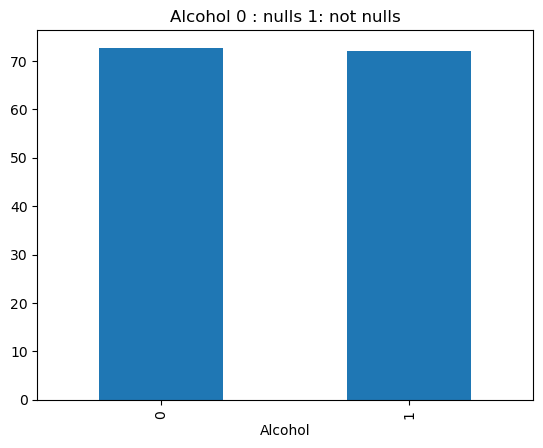

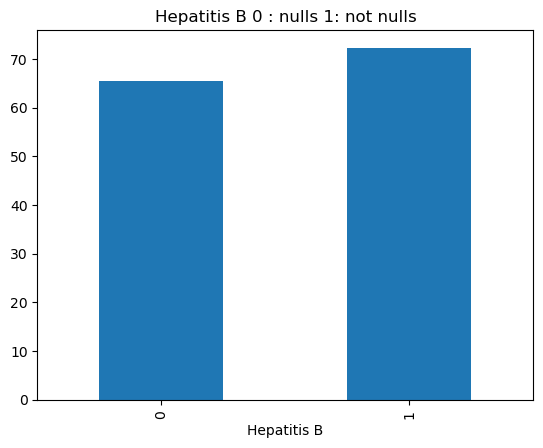

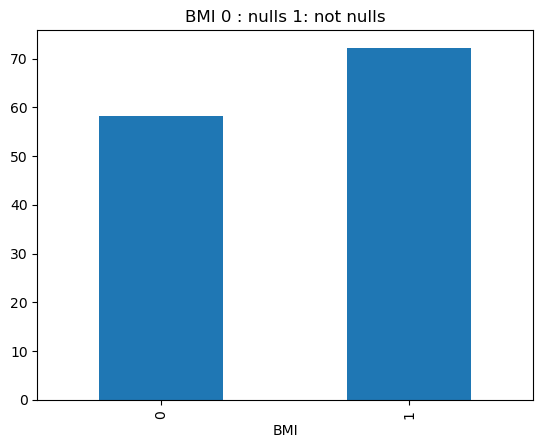

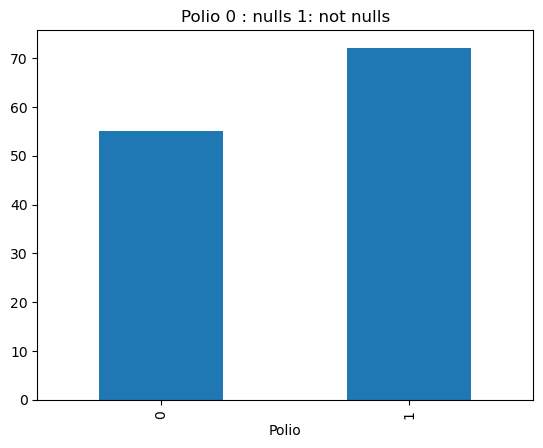

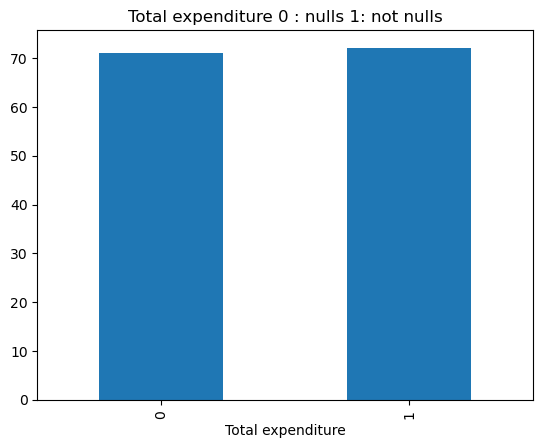

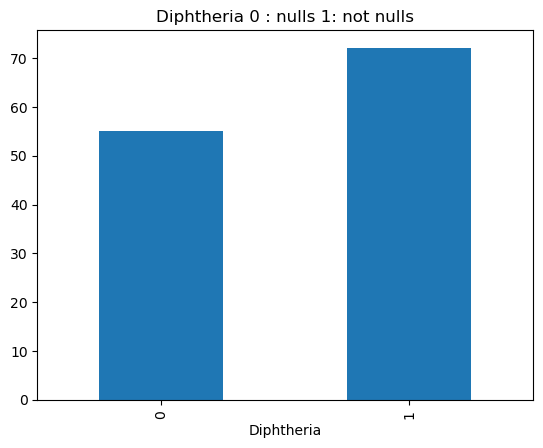

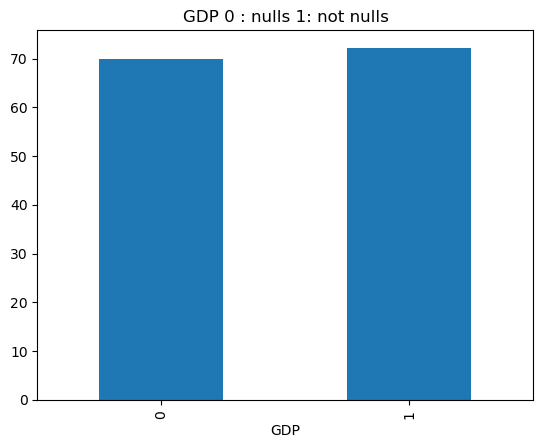

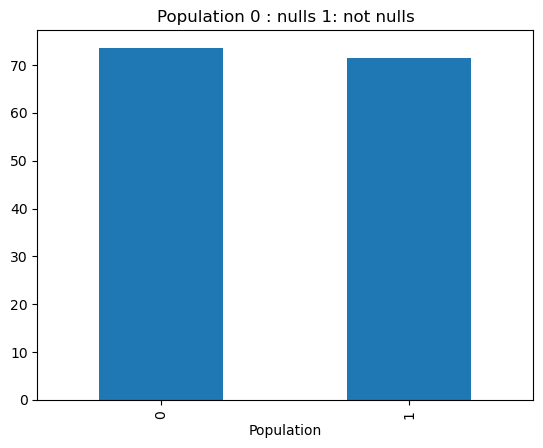

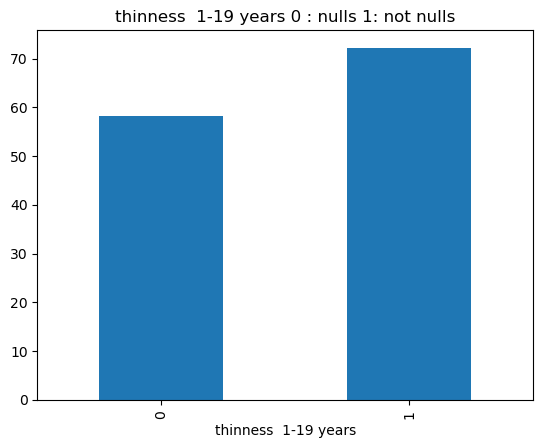

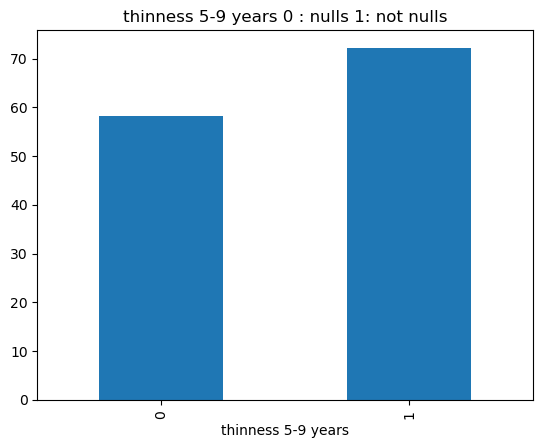

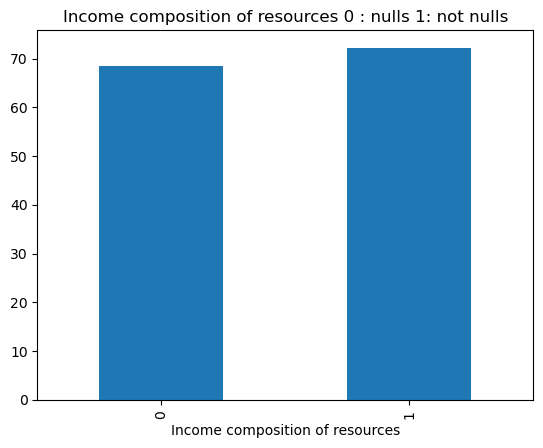

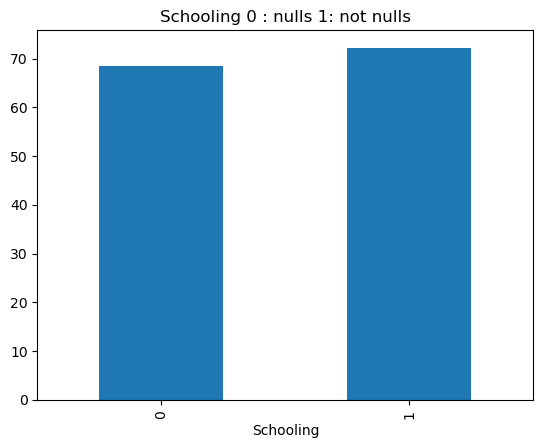

In [120]:
for feature in continous_features_withnull:
    data = le_data.copy()
    data[feature]=np.where(data[feature].isnull(),0,1)
    data.groupby(feature)['Life expectancy'].median().plot.bar()
    plt.title(feature +' 0 : nulls 1: not nulls' )
    plt.show()

**Interpretation: For population and alcohol feature the median life expectancy is more for the rows having null values. Hence we will be keeping the rows with null values and handling them rather than dropping them.**

### Imputing missing values in numerical columns:
1. we have to consider mode value for imputing in features with discrete values
2. we have to consider median or mean values for imputing in features with continuous values

### Imputing with mode for columns with discrete values

In [121]:
for i in discrete_features_withnull:
    data=le_data.copy()
    mode_val=data[i].mode().values[0]
    le_data[i].fillna(mode_val,inplace=True)

In [122]:
le_data[discrete_features_withnull].isnull().sum()

Series([], dtype: float64)

### Imputing with median and mean for continous values.
1. If the feature has outliers, imputing missing values with median of the feature values
2. Else imputing missing values in the feature with mean of the feature values as mean is prone to outliers

In [123]:
for i in continous_features_withnull:
    data=le_data.copy()
    if(le_data[abs(stats.zscore(le_data['GDP']))>3].shape[0]):
        median_val=data[i].median()
        le_data[i].fillna(median_val,inplace=True)
    else:
        mean_val=data[i].mean()
        le_data[i].fillna(mean_val,inplace=True)

In [124]:
stats.zscore(le_data['GDP'])

0      -0.525277
1      -0.523115
2      -0.521667
3      -0.518762
4      -0.564861
          ...   
2933   -0.535151
2934   -0.535228
2935   -0.565331
2936   -0.527988
2937   -0.528082
Name: GDP, Length: 2928, dtype: float64

In [125]:
pd.set_option('display.max_columns', None)
le_data.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928,2928.00000,2928,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
unique,183,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.50000,NaN,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.026315e+07,4.833675,4.865232,0.630128,12.016052
std,NaN,4.61056,NaN,9.523867,124.292079,118.114450,3.914923,1990.930605,22.531361,11485.970937,19.850184,160.700547,23.340548,2.385478,23.629576,5.085542,13157.128331,5.411179e+07,4.399553,4.487535,0.205440,3.254407
min,NaN,2000.00000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2003.75000,NaN,63.100000,74.000000,0.000000,1.107500,4.853964,80.960842,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,NaN,2007.50000,NaN,72.100000,144.000000,3.000000,4.160000,65.611455,87.000000,17.000000,43.000000,4.000000,93.000000,5.930163,93.000000,0.100000,3112.560501,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,NaN,2011.25000,NaN,75.700000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7494.210719,4.592777e+06,7.100000,7.200000,0.773000,14.100000


**Interpretation:**
    
* Life expectancy: Ranges from 36.3 to 89 years with a mean of around 69.22 years.

* Adult Mortality: Has a wide range with a mean of approximately 164.80.

* Alcohol: Ranges from 0.01 to 17.87, with an average value around 4.61.

* BMI : Has a wide range with an average around 38.24.

* GDP : Ranges from 1.68 to 119,172.74 with an average of 7,494.21. There is high amount of skewness in the data.

* Population: The population column has a vast range, ranging from 34 to approximately 1.29 billion. 

* Income composition of resources : Has a range from 0.000 to 0.948, with an average of 0.630.

* Schooling: Has an average of 12.02 years with a range from 0.00 to 20.70.


## Schooling vs Life expectancy

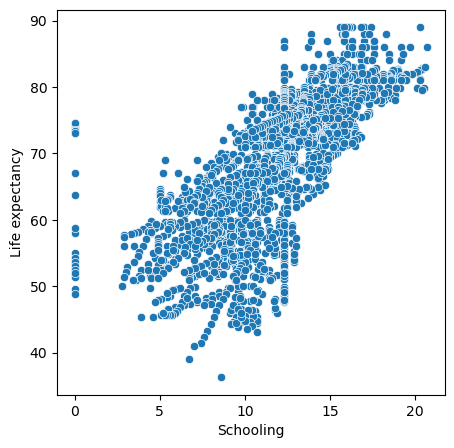

In [126]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=le_data["Schooling"], y=le_data["Life expectancy"])
plt.show()

**Interpretation:**

* Life expectancy and schooling have linear association hence it may be a good predictor variable

## Income composition of resources vs Life expectancy

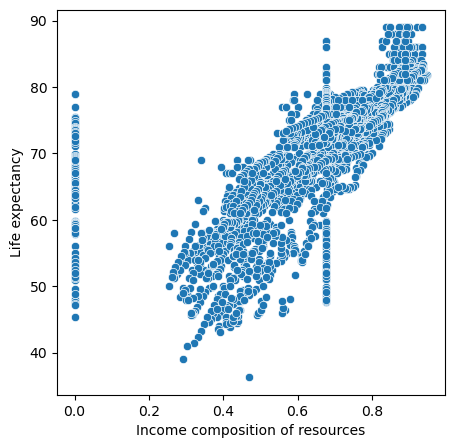

In [127]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=le_data["Income composition of resources"], y=le_data["Life expectancy"])
plt.show()

**Interpretation:**

* Life expectancy and Income composition of resources have linear association hence it may be a good predictor variable.

## BMI vs Alcohol Composition

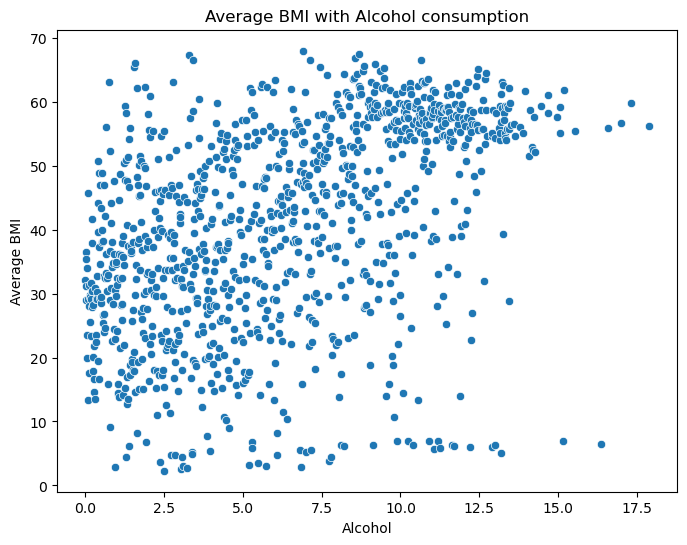

In [128]:
pivot_df = le_data.pivot_table(index='Alcohol', values='BMI', aggfunc='mean')

# Plotting the pivot table data using Seaborn lineplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pivot_df, x=pivot_df.index, y='BMI')
plt.xlabel('Alcohol')
plt.ylabel('Average BMI')
plt.title('Average BMI with Alcohol consumption')
plt.show()

**Interpretation:**

*  Higher BMI people have higher alcohol consumption.

## GDP vs Status

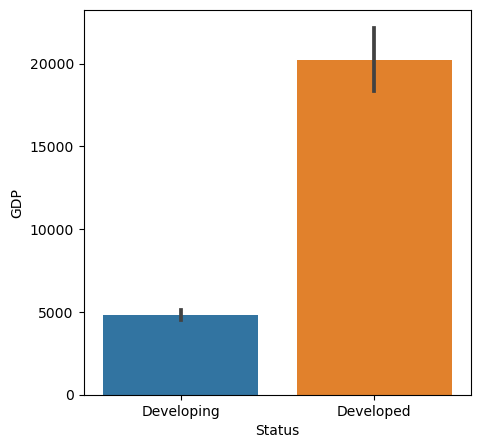

In [129]:
plt.figure(figsize=(5,5))
sns.barplot(y=le_data["GDP"], x=le_data["Status"])
plt.show()

**Interpretation:**
As expected developed countries have higher GDP. 

## GDP vs Schooling

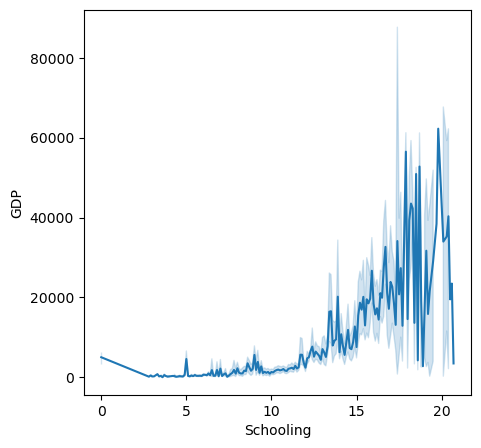

In [130]:
plt.figure(figsize=(5,5))
sns.lineplot(y=le_data["GDP"], x=le_data["Schooling"])
plt.show()

**Interpretation:**
    
* People in countries with higher GDP have access to more years of schooling.

## Polio vs country status and Diphtheria vs country status

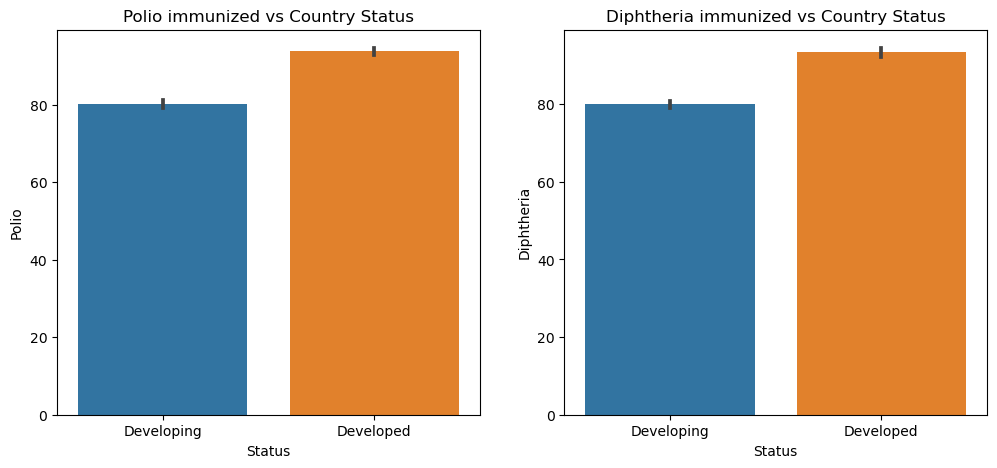

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(y=le_data["Polio"], x=le_data["Status"])
plt.title('Polio immunized vs Country Status')

plt.subplot(1, 2, 2)
sns.barplot(y=le_data["Diphtheria"], x=le_data["Status"])
plt.title('Diphtheria immunized vs Country Status')
plt.show()


 **Interpretation:**
    
* People in developed countries show larger number of immunization to polio and Diphtheria.

## Alcohol vs Country Status

<Figure size 500x500 with 0 Axes>

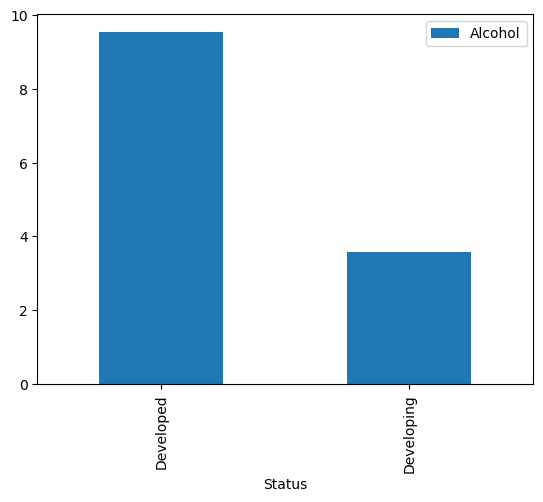

In [132]:
plt.figure(figsize=(5,5))
pd.pivot_table(le_data, values='Alcohol',index='Status' , aggfunc='mean').plot(kind='bar')
# sns.scatterplot(x=le_data["Alcohol"],y=le_data["Adult Mortality"],hue=le_data["Status"])
plt.show()

**Interpretation:**

* In developing countries alcohol consumers are comparitively low than developed countries.

## Top 5 countries with min avg life expectancy

In [133]:
le_data.pivot_table(index=['Country','Status'],values='Life expectancy', aggfunc='mean').sort_values(by='Life expectancy',ascending=False).tail(5)

,,Life expectancy
Country,Status,
Malawi,Developing,49.89375
Angola,Developing,49.01875
Lesotho,Developing,48.78125
Central African Republic,Developing,48.51250
Sierra Leone,Developing,46.11250


**Interpretation:**
1. The lowest avg life expectancy is 46.11 years that is of Sierra Leone.
2. All the countries with lowest average life expectancy fall under the Developing status.

## Status of a country vs average life expectancy

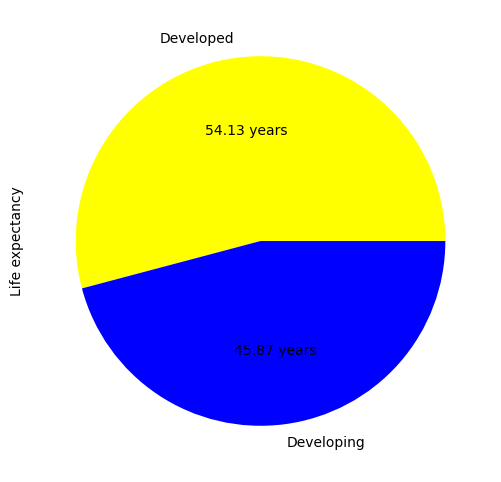

In [134]:
plt.figure(figsize=(8,6))
le_data.groupby(['Status'])['Life expectancy'].mean().plot(kind='pie',autopct='%1.2f years',y='Life Expectancy',colors=['yellow','blue'])
plt.show()

**Interpretation:**
1. Developed countries are showing higher average Life expectancy than developing countries.
2. This might be because of the availability and accessibility of better medical facilities in developed countries.

## Countries having the highest adult mortality rate 

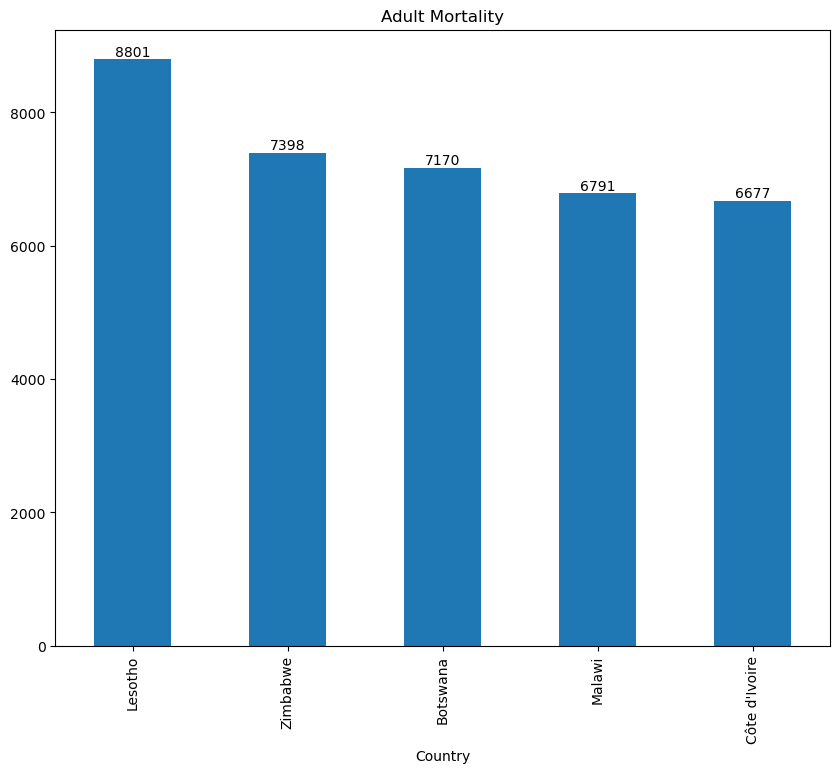

In [135]:
plt.figure(figsize=(10,8))

plt.title("Adult Mortality")
axiss=le_data.groupby(['Country'])['Adult Mortality'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
for i in axiss.containers:
    axiss.bar_label(i)
plt.show()

**Interpretation:**
1. Developing countries are showing higher adult mortality rate with Lesotho being at the top.
2. This might be because of the unavailability and inaccessibility of better medical facilities in developing countries.

## Countries having the highest infant mortality

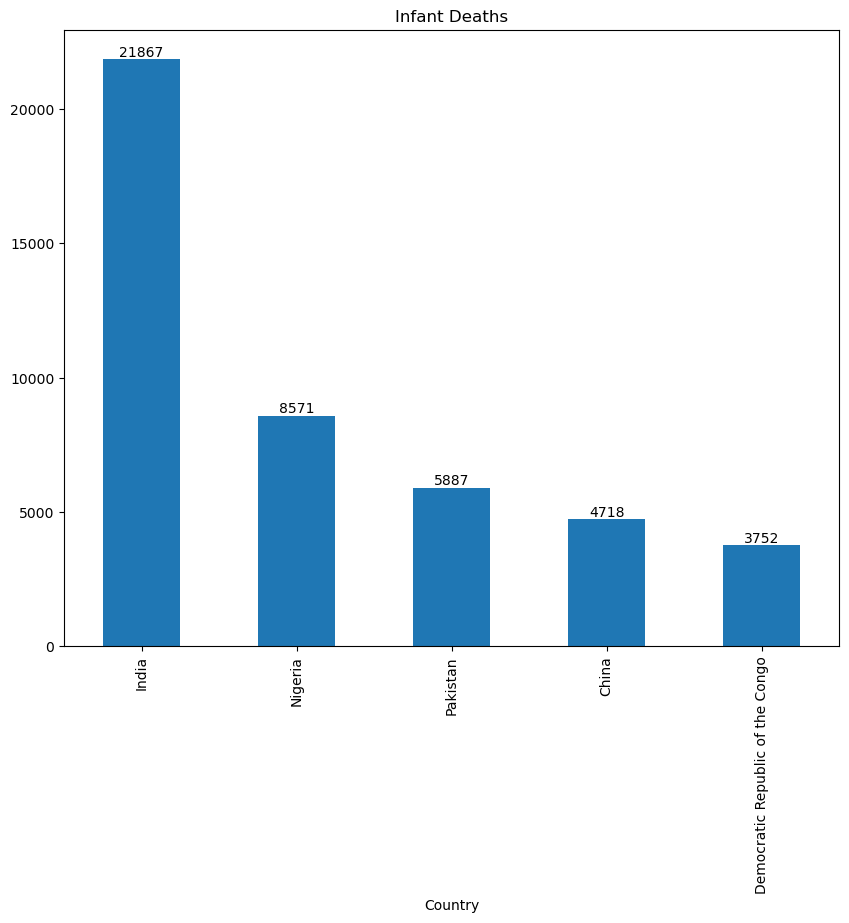

In [136]:
infantdeathdata=le_data.groupby(['Country'])['infant deaths'].sum()

plt.figure(figsize=(10,8))
axiss=infantdeathdata.sort_values(ascending=False).head(5).plot(kind='bar')
plt.title("Infant Deaths")
for i in axiss.containers:
    axiss.bar_label(i)

**Interpretation:**
1. Developing countries are showing higher infant deaths with India being at the top.
2. This might be because of the availability and accessibility of better medical facilities in developed countries.

## Life expectancy vs Measles

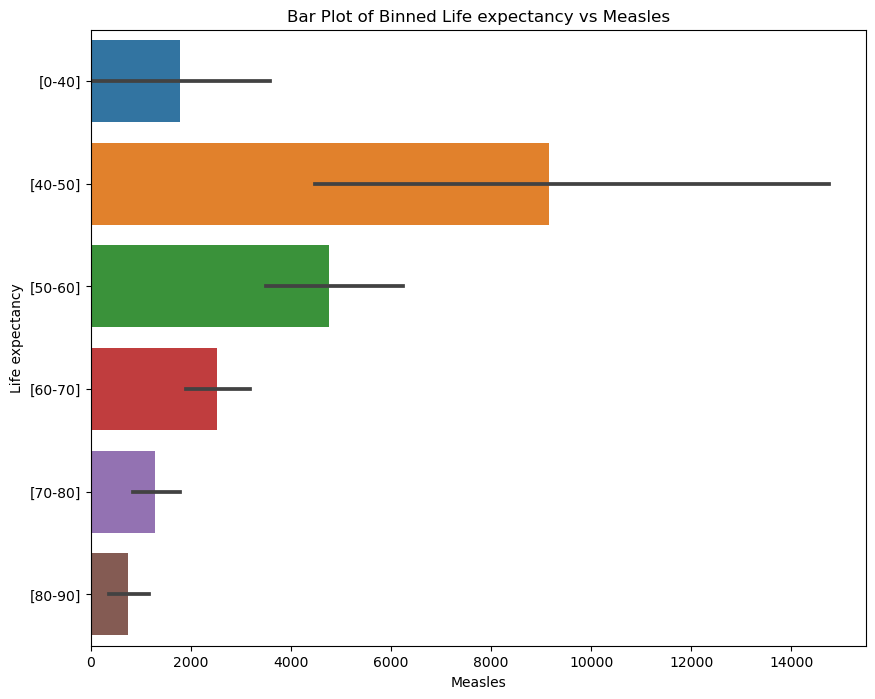

In [137]:
plt.figure(figsize=(10, 8))
lebins = pd.cut(le_data['Life expectancy'], bins=[0, 40, 50, 60, 70, 80, 90],labels=['[0-40]','[40-50]','[50-60]','[60-70]','[70-80]','[80-90]'])
sns.barplot(data=le_data, y=lebins, x='Measles')
plt.ylabel('Life expectancy')
plt.xlabel('Measles')
plt.title('Bar Plot of Binned Life expectancy vs Measles')
plt.show()

**Interpretation:**

The highest no of reported measles cases had a life expectancy of 40-50

## GDP vs Adult Mortality

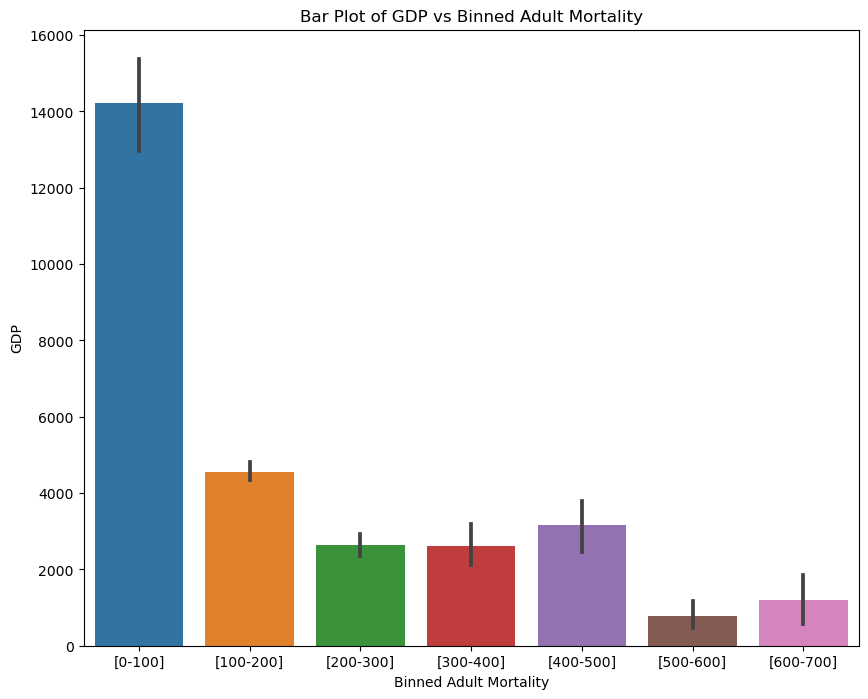

In [138]:
plt.figure(figsize=(10, 8))
ambins = pd.cut(le_data['Adult Mortality'], bins=[0, 100, 200, 300, 400, 500, 600, 700],labels=['[0-100]','[100-200]','[200-300]','[300-400]','[400-500]','[500-600]','[600-700]'])
sns.barplot(data=le_data, x=ambins, y='GDP',estimator='mean')
plt.xlabel('Binned Adult Mortality')
plt.ylabel('GDP')
plt.title('Bar Plot of GDP vs Binned Adult Mortality')
plt.show()

**Interpretation:**
1. Adult mortality is high for countries with lower GDP per capital. GDP per capita represents the average income or economic output per person in a country. 
2. This indicates that the people who are economically incapable of availing the medical facilities have may have higher chances of death.

##  Life Expectancy variation with time vs Country status 

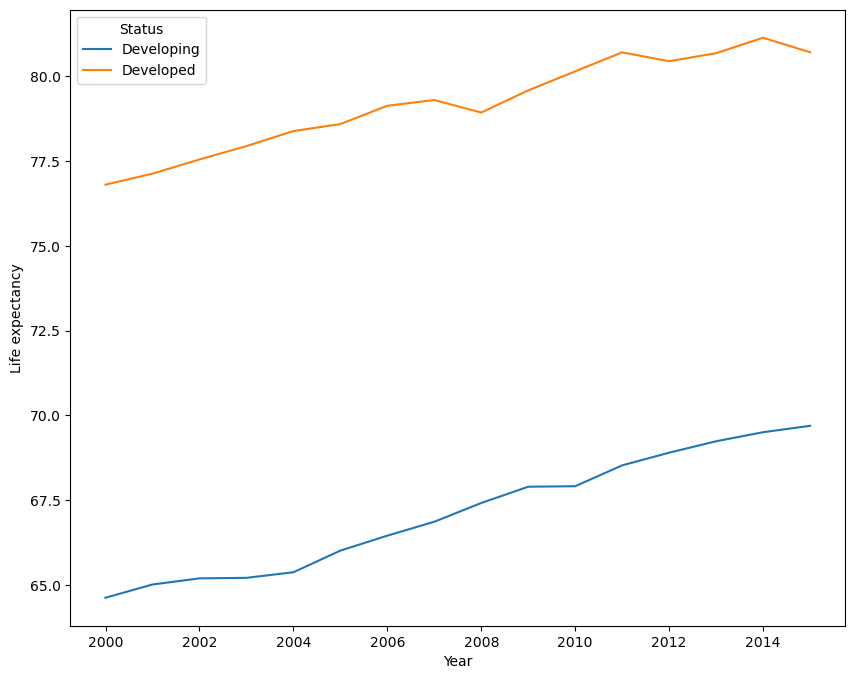

In [139]:
plt.figure(figsize=(10,8))
sns.lineplot(data=le_data,y='Life expectancy',x='Year', hue='Status', errorbar=None)
plt.show()

**Interpretation:**
1. Life expectancy is growing in case of developed countries as well as developing countries with passing years.
2. But the Life expectancy was comparatively very low in case of developing countries that is around 64 in 2000 whereas in case of developed countries it was around 77 in 2000.
2. Hence year doesn't necessarily helps in predicting the life expectancy. Hence we can drop it.

#### Dropping Irrelevant columns:

Time and Country features are irrelevant in the prediction of life expectancy hence we drop it.

In [140]:
le_data.drop(['Year','Country'],inplace=True, axis=1)

### Plotting the distributions for Numerical columns

<Figure size 1000x1000 with 0 Axes>

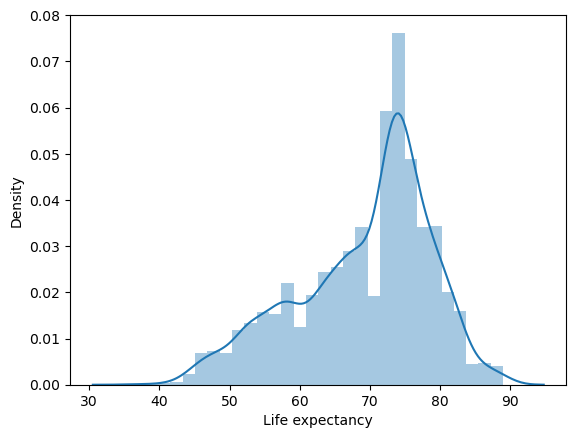

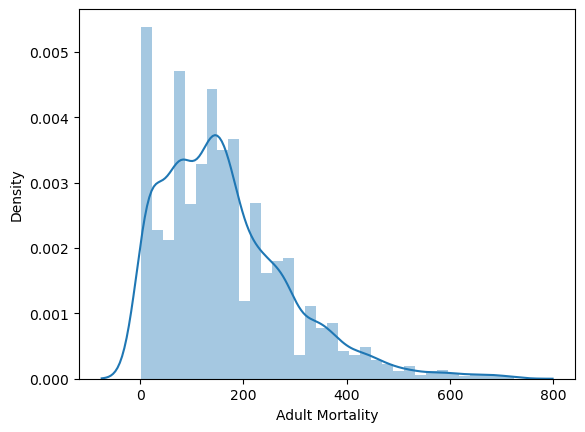

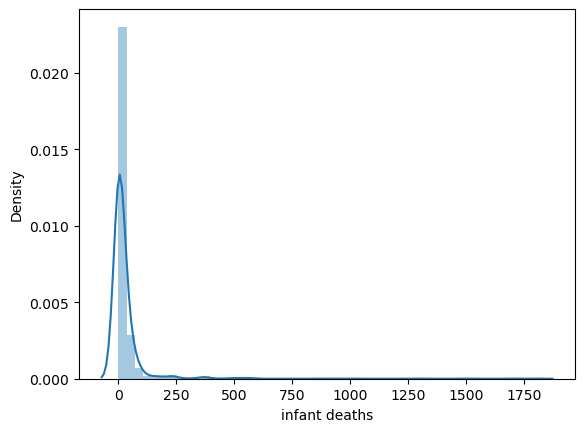

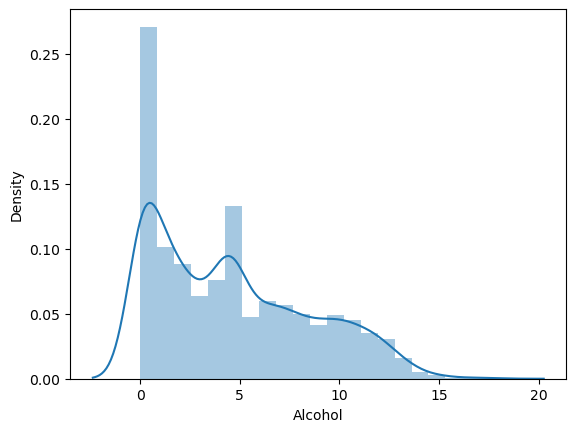

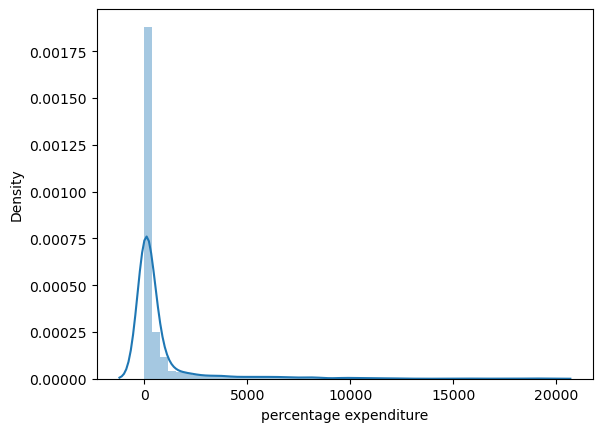

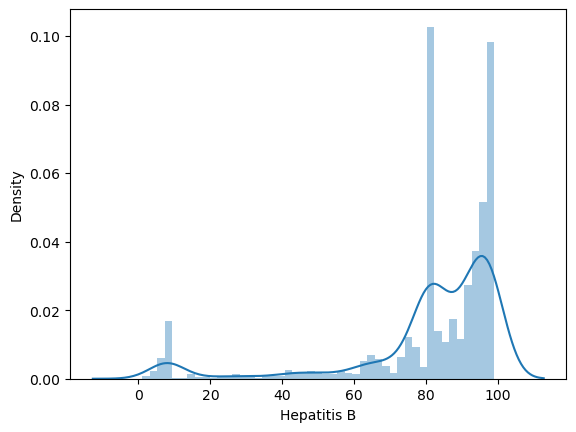

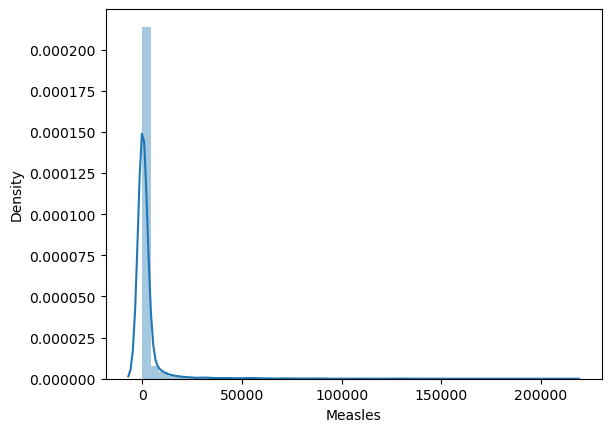

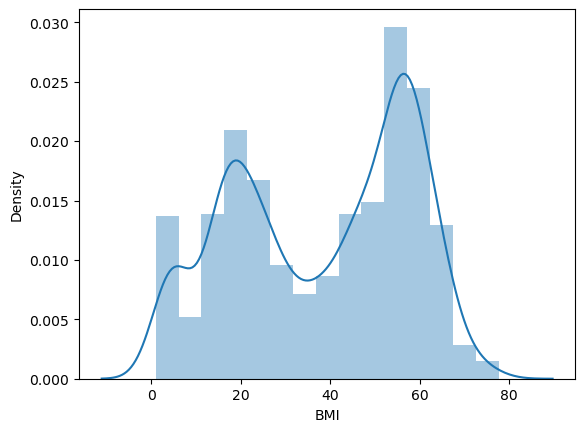

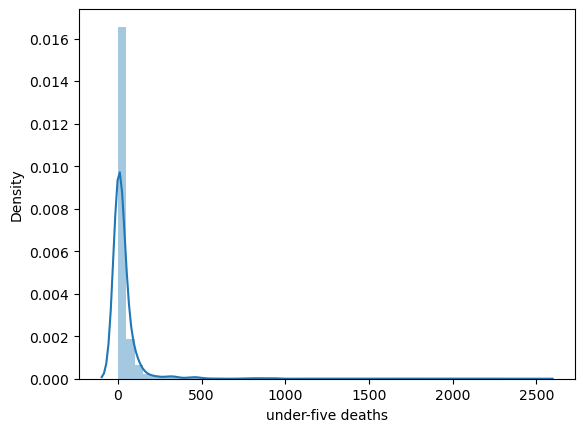

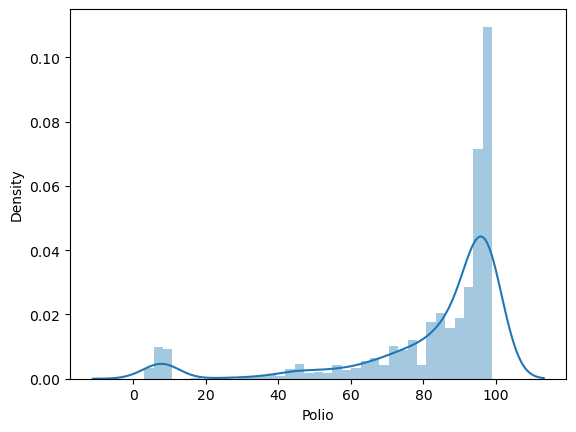

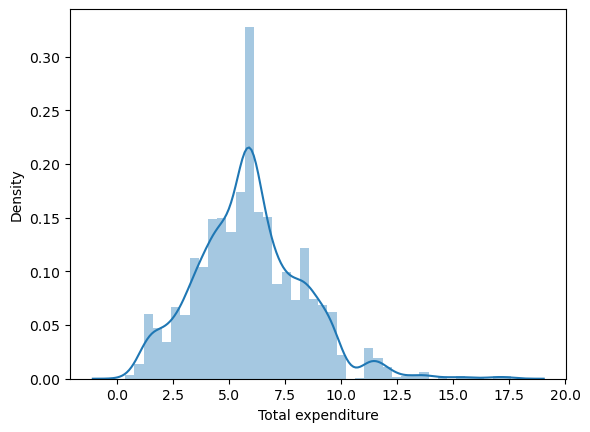

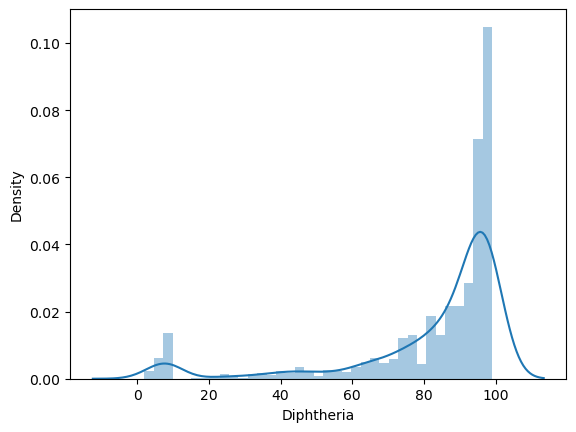

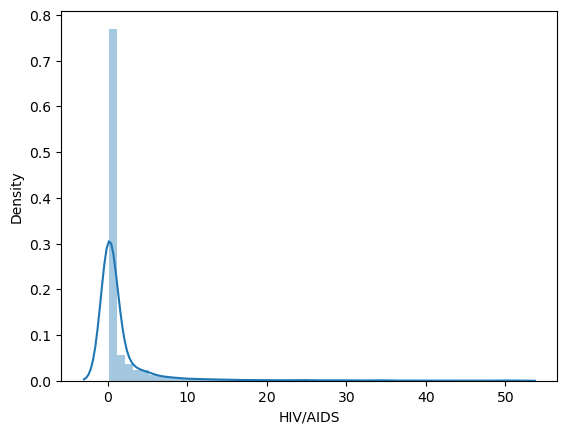

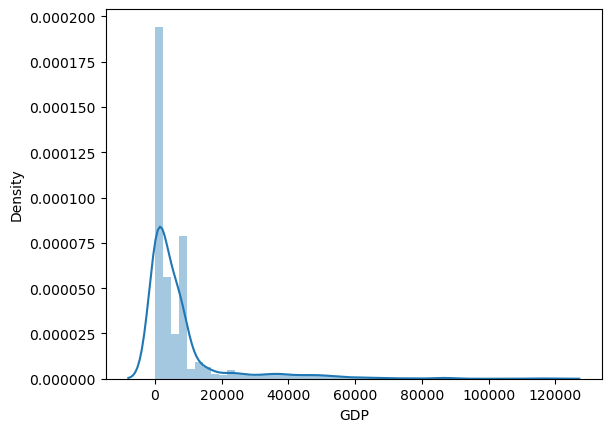

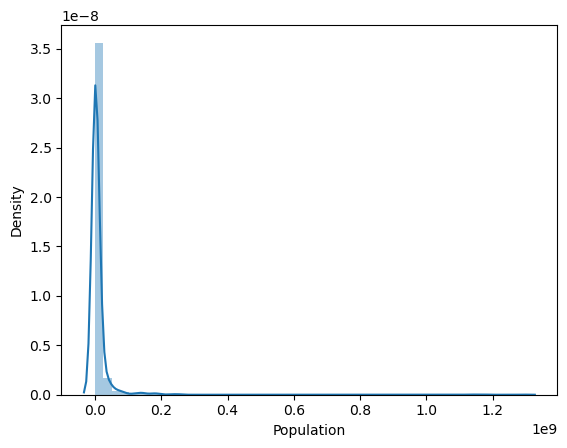

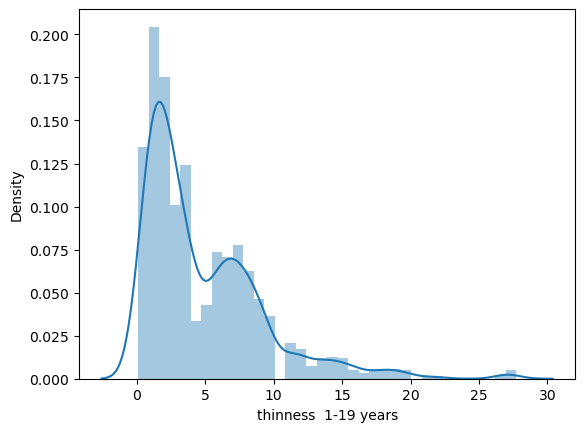

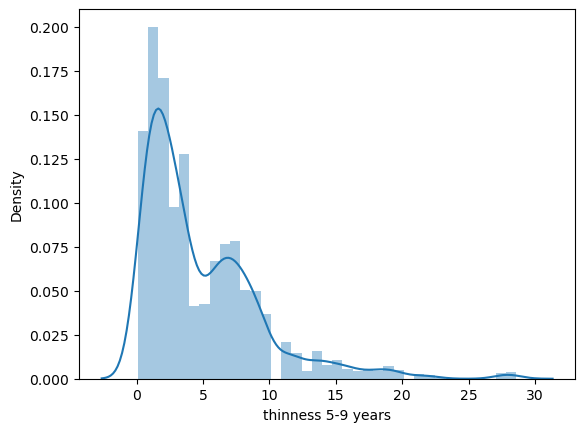

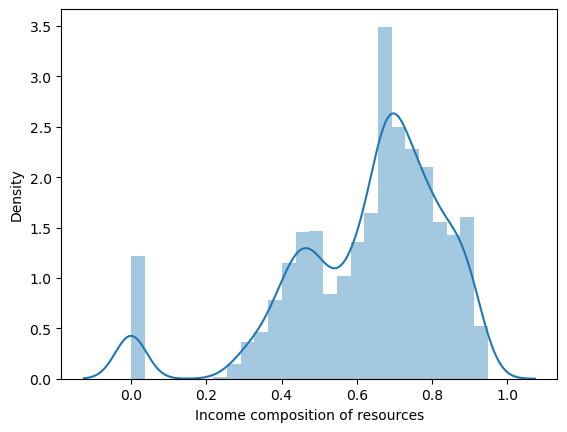

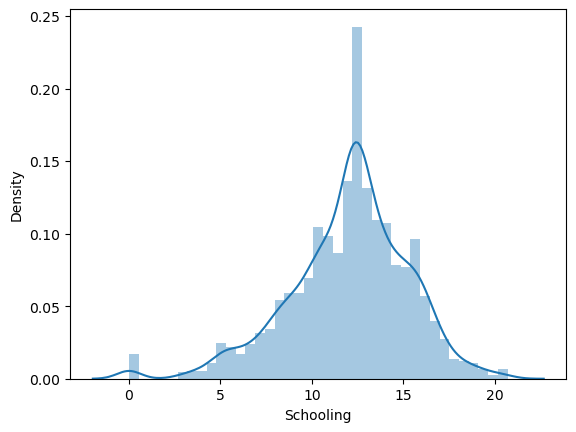

In [141]:
le_data_num=le_data.select_dtypes('number')
plt.figure(figsize=(10,10))
for i in le_data_num.columns.tolist():
    plt.figure()
    sns.distplot(le_data_num[i])
    
    plt.show()

**Interpretation:**
1. Most people have a life expectancy of 72-80 years.
2. Highest number of adulty mortality rate lies in the region 0-200. (probability of dying between 15 and 60 years per 1000 population)
3. Most common number of infant deaths is in between 0-10 per 1000 population
4. Maximum consumption (in litres of pure alcohol) is seen between 0-10 liters which is alarming
5. Expenditure on health as a percentage of Gross Domestic Product per capita(%) is very low for maximum contries.
6. There are still people who are not Hepatitis B (HepB) immunized which is again a concern.
7. The no of measles cases reported lies between 0 to 40.
8. A lot of people show a higher BMI around 40 to 65 which is alarming.
9. Maximum number of under-five deaths per 1000 population lies between 0-10 which is similar to number of infant deaths
10. There are still people who are not Polio (Pol3) immunized.
11. Total government expenditure on health as a percentage of total government expenditure  is quite low and mostly lie between 4.5 and 6
12. Deaths per 1000 live births HIV/AIDS (0-4 years) has negative values which needs to be handled

# Data Preprocessing

In [142]:
le_data.skew()

Life expectancy                    -0.638605
Adult Mortality                     1.174369
infant deaths                       9.771044
Alcohol                             0.607622
percentage expenditure              4.643790
Hepatitis B                        -2.146879
Measles                             9.425290
BMI                                -0.231828
under-five deaths                   9.479623
Polio                              -2.104791
Total expenditure                   0.600863
Diphtheria                         -2.079352
HIV/AIDS                            5.386623
GDP                                 3.476242
Population                         17.943300
thinness  1-19 years                1.727662
thinness 5-9 years                  1.793650
Income composition of resources    -1.208178
Schooling                          -0.615206
dtype: float64

### Interpretation:
1. Population has high positive skewness
2. Infant deaths, measles  and under-five deaths are again highly positively skewed.
3. Percentage expenditure, HIV/AIDS and GDP are comparatively less positively skewed.
4. High values of positive skewness depicts the columns have large number of outliers towards the right side of the distribution

In [143]:
positive_skewed_features=['Population','HIV/AIDS','GDP','infant deaths','Measles', 'under-five deaths', 'percentage expenditure']
for i in positive_skewed_features:
    print(i,":",le_data[i].skew())

Population : 17.94330030397561
HIV/AIDS : 5.386623166297798
GDP : 3.476241503952702
infant deaths : 9.771044493066025
Measles : 9.425290043118961
under-five deaths : 9.47962292313507
percentage expenditure : 4.643789671991245


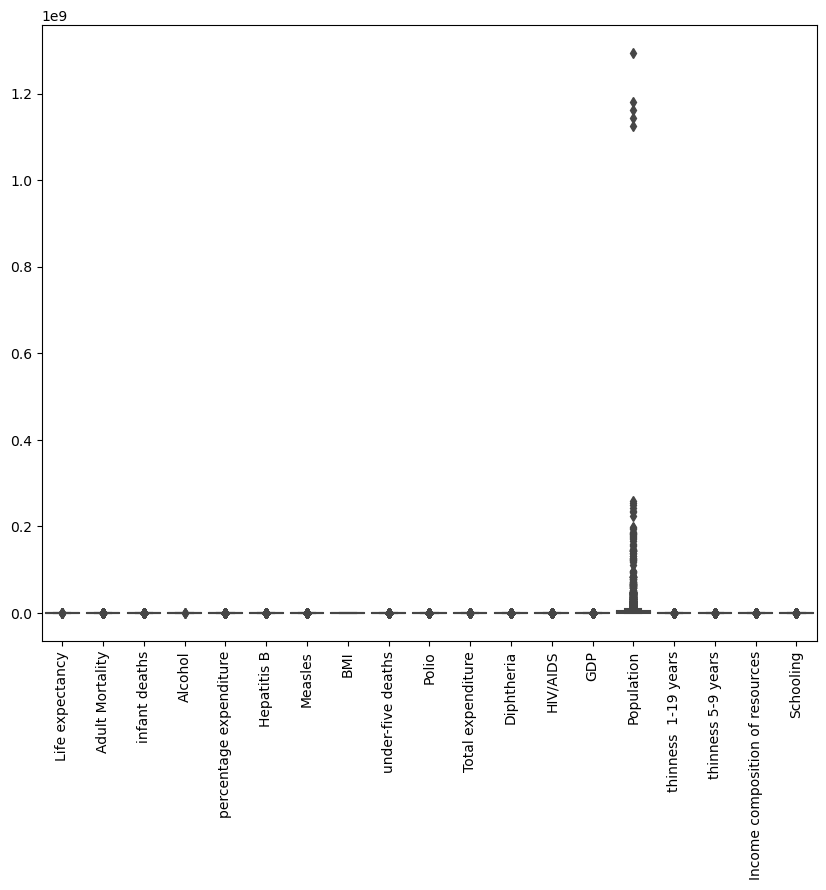

In [144]:
# checking outliers for numerical columns
plt.figure(figsize=(10,8))
sns.boxplot(data=le_data)
plt.xticks(rotation = 90)
plt.show()

**Interpretation: As there are outliers in the data and outliers as they can skew the results and don't give us enough examples to learn from**

In [145]:
le_data.drop(['Population'],inplace=True, axis=1)

#### Logically Population is not having any impact on Life Expectancy. Hence we can drop it.

## Outlier Removal

In [146]:
# #getting threshold for outliers
# Q1=le_data_num.quantile(0.25)
# Q3=le_data_num.quantile(0.75)
# IQR=Q3-Q1
# lower_bound= Q1 - 1.5*IQR
# upper_bound= Q3 + 1.5*IQR

In [147]:
# le_data.shape

In [148]:
# le_data=le_data[~((le_data_num<lower_bound)|(le_data_num>upper_bound)).any(axis=1)]

In [149]:
# le_data.shape

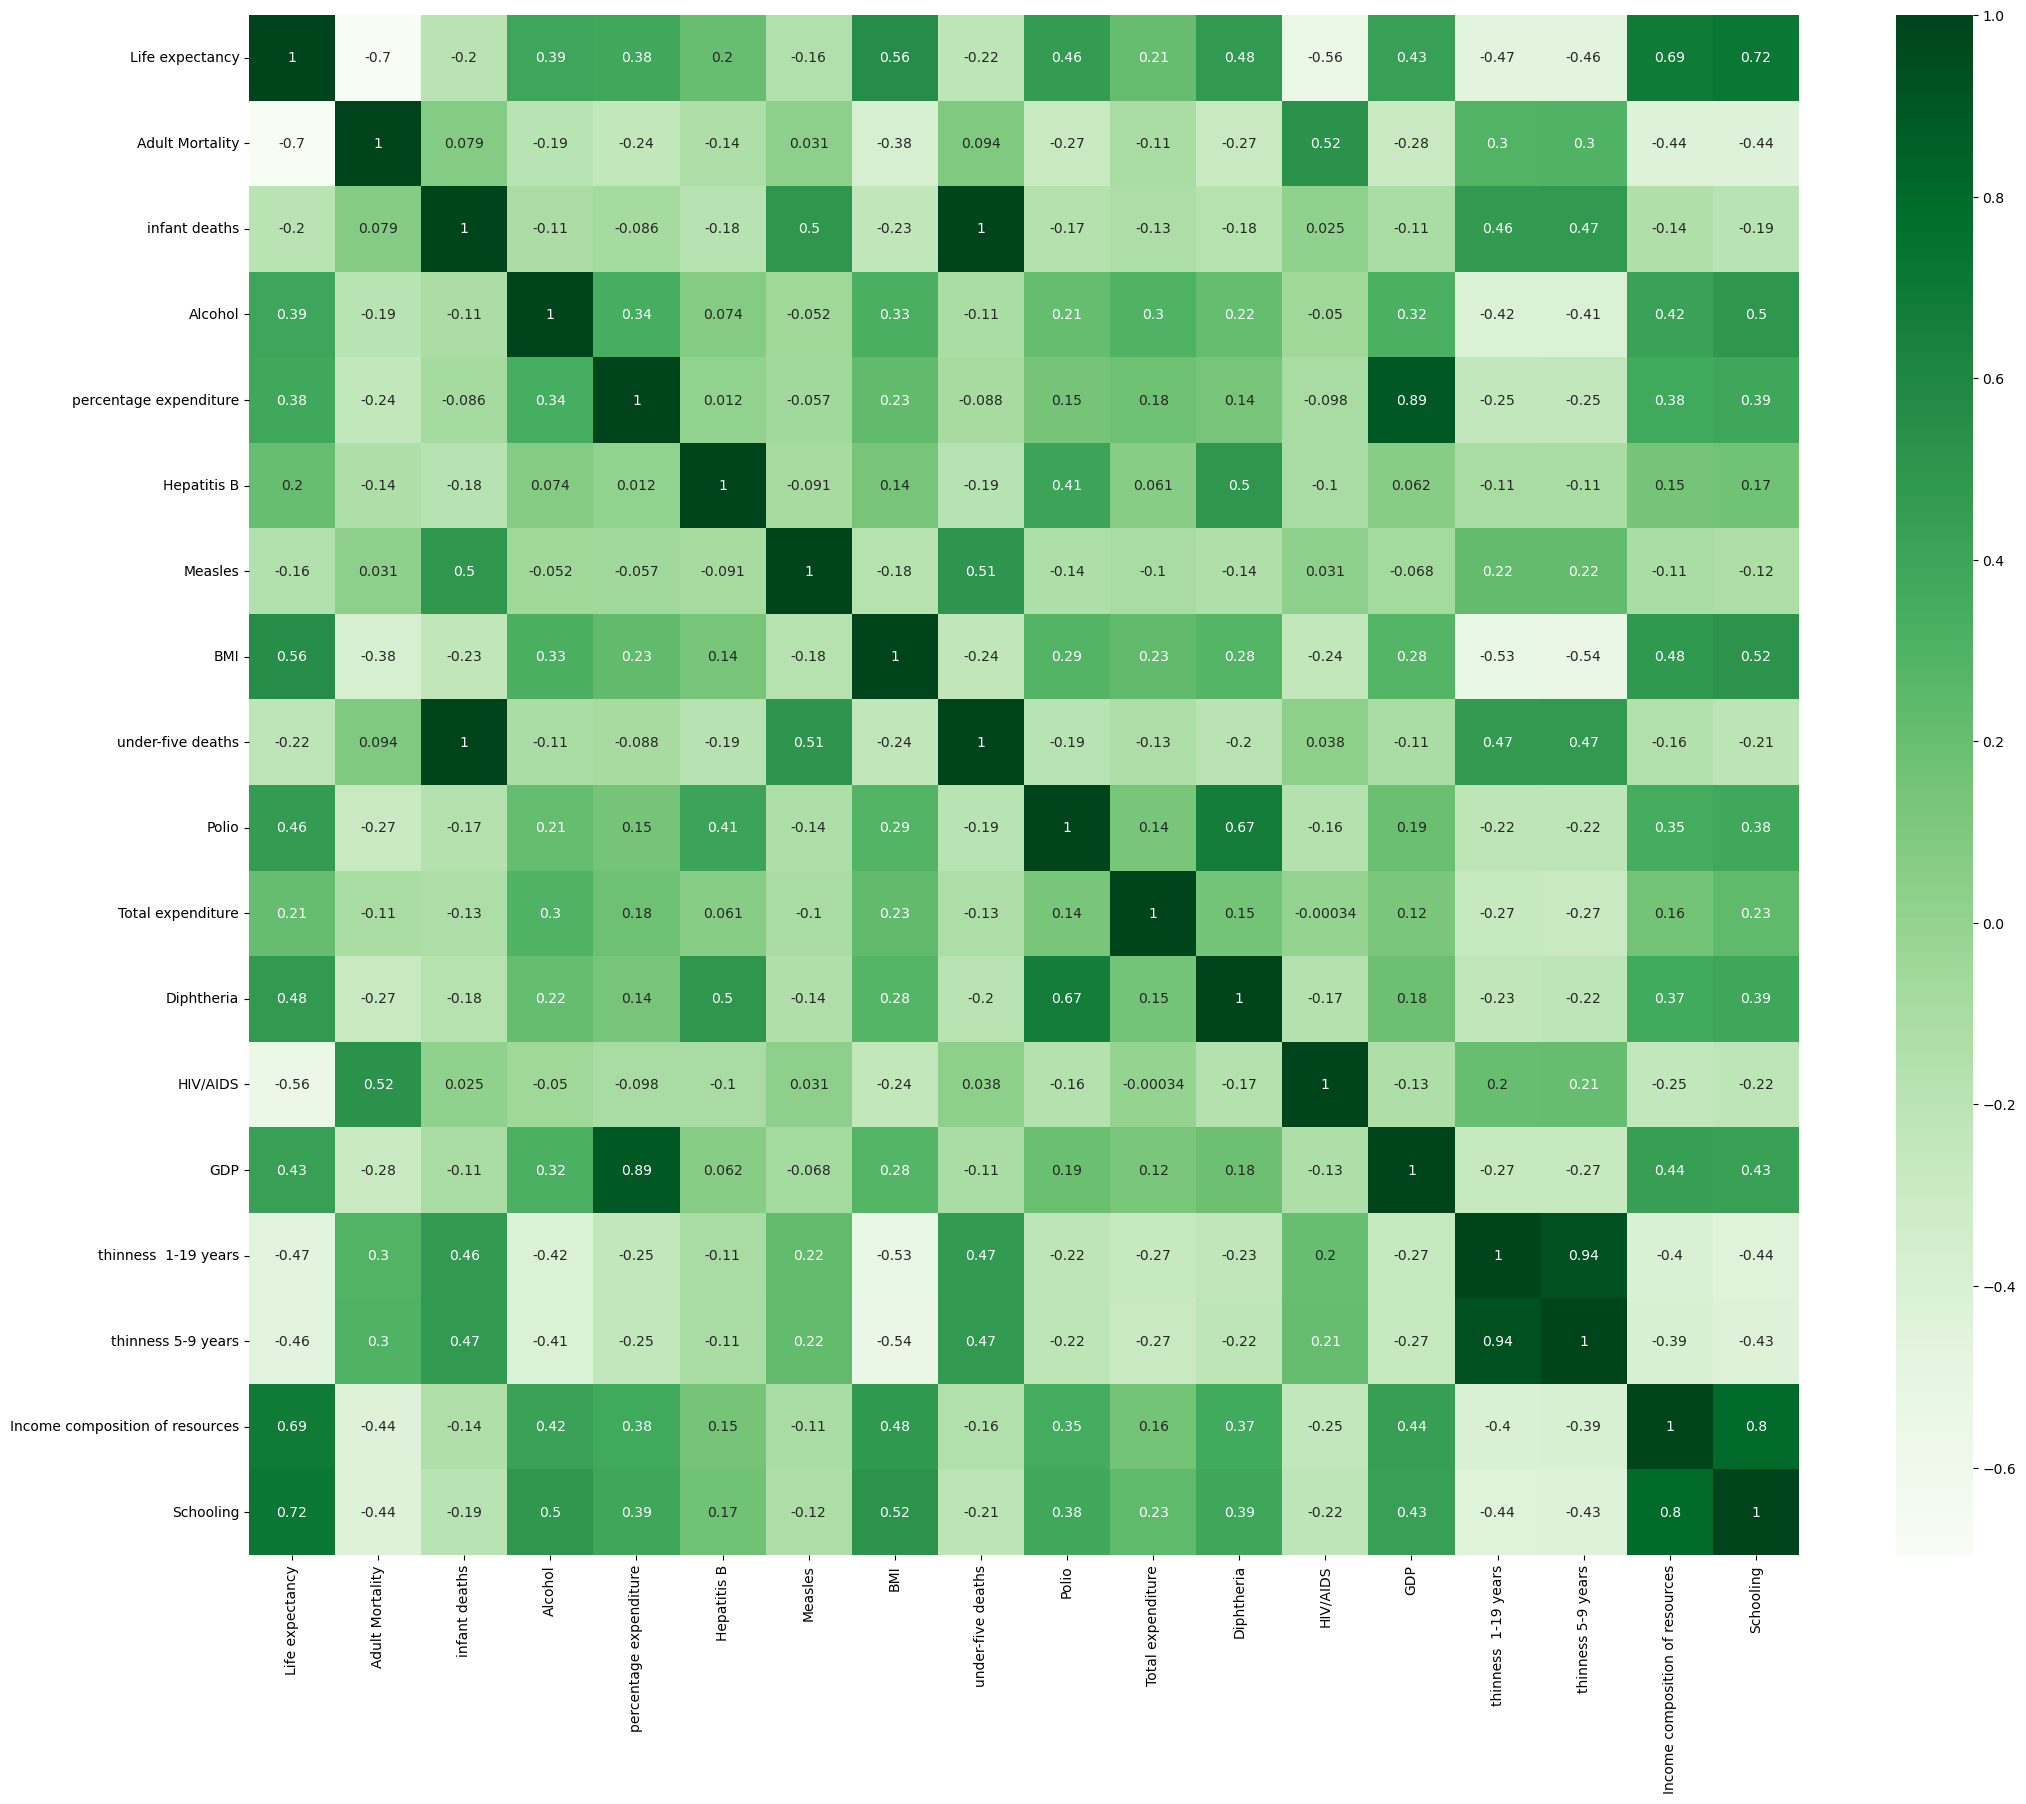

In [150]:
# correlation matrix:
le_data_num=le_data.select_dtypes('number')
plt.figure(figsize=(25,20))
sns.heatmap(le_data_num.corr(),annot=True,cmap='Greens')

plt.show()

### Interpretation:

1. 'under 5 deaths' and 'infant deaths' features are highly correlated. Hence dropping 1 of the column won't affect the performance of the model. Hence dropping 'under 5 death' column.
2. 'gdp' and 'percentage expenditure' features are highly correlated. Hence dropping 1 of the column won't affect the performance of the model. Hence dropping 'percentage expenditure' column.
3. 'thinness 1-19 years' and 'thinness 5-9 years' features are highly correlated. Hence dropping 1 of the column won't affect the performance of the model. Hence dropping 'thinness 5-9 years' column.

In [151]:
le_data.drop(['thinness 5-9 years','under-five deaths','Income composition of resources','Diphtheria','percentage expenditure'],inplace=True, axis=1)

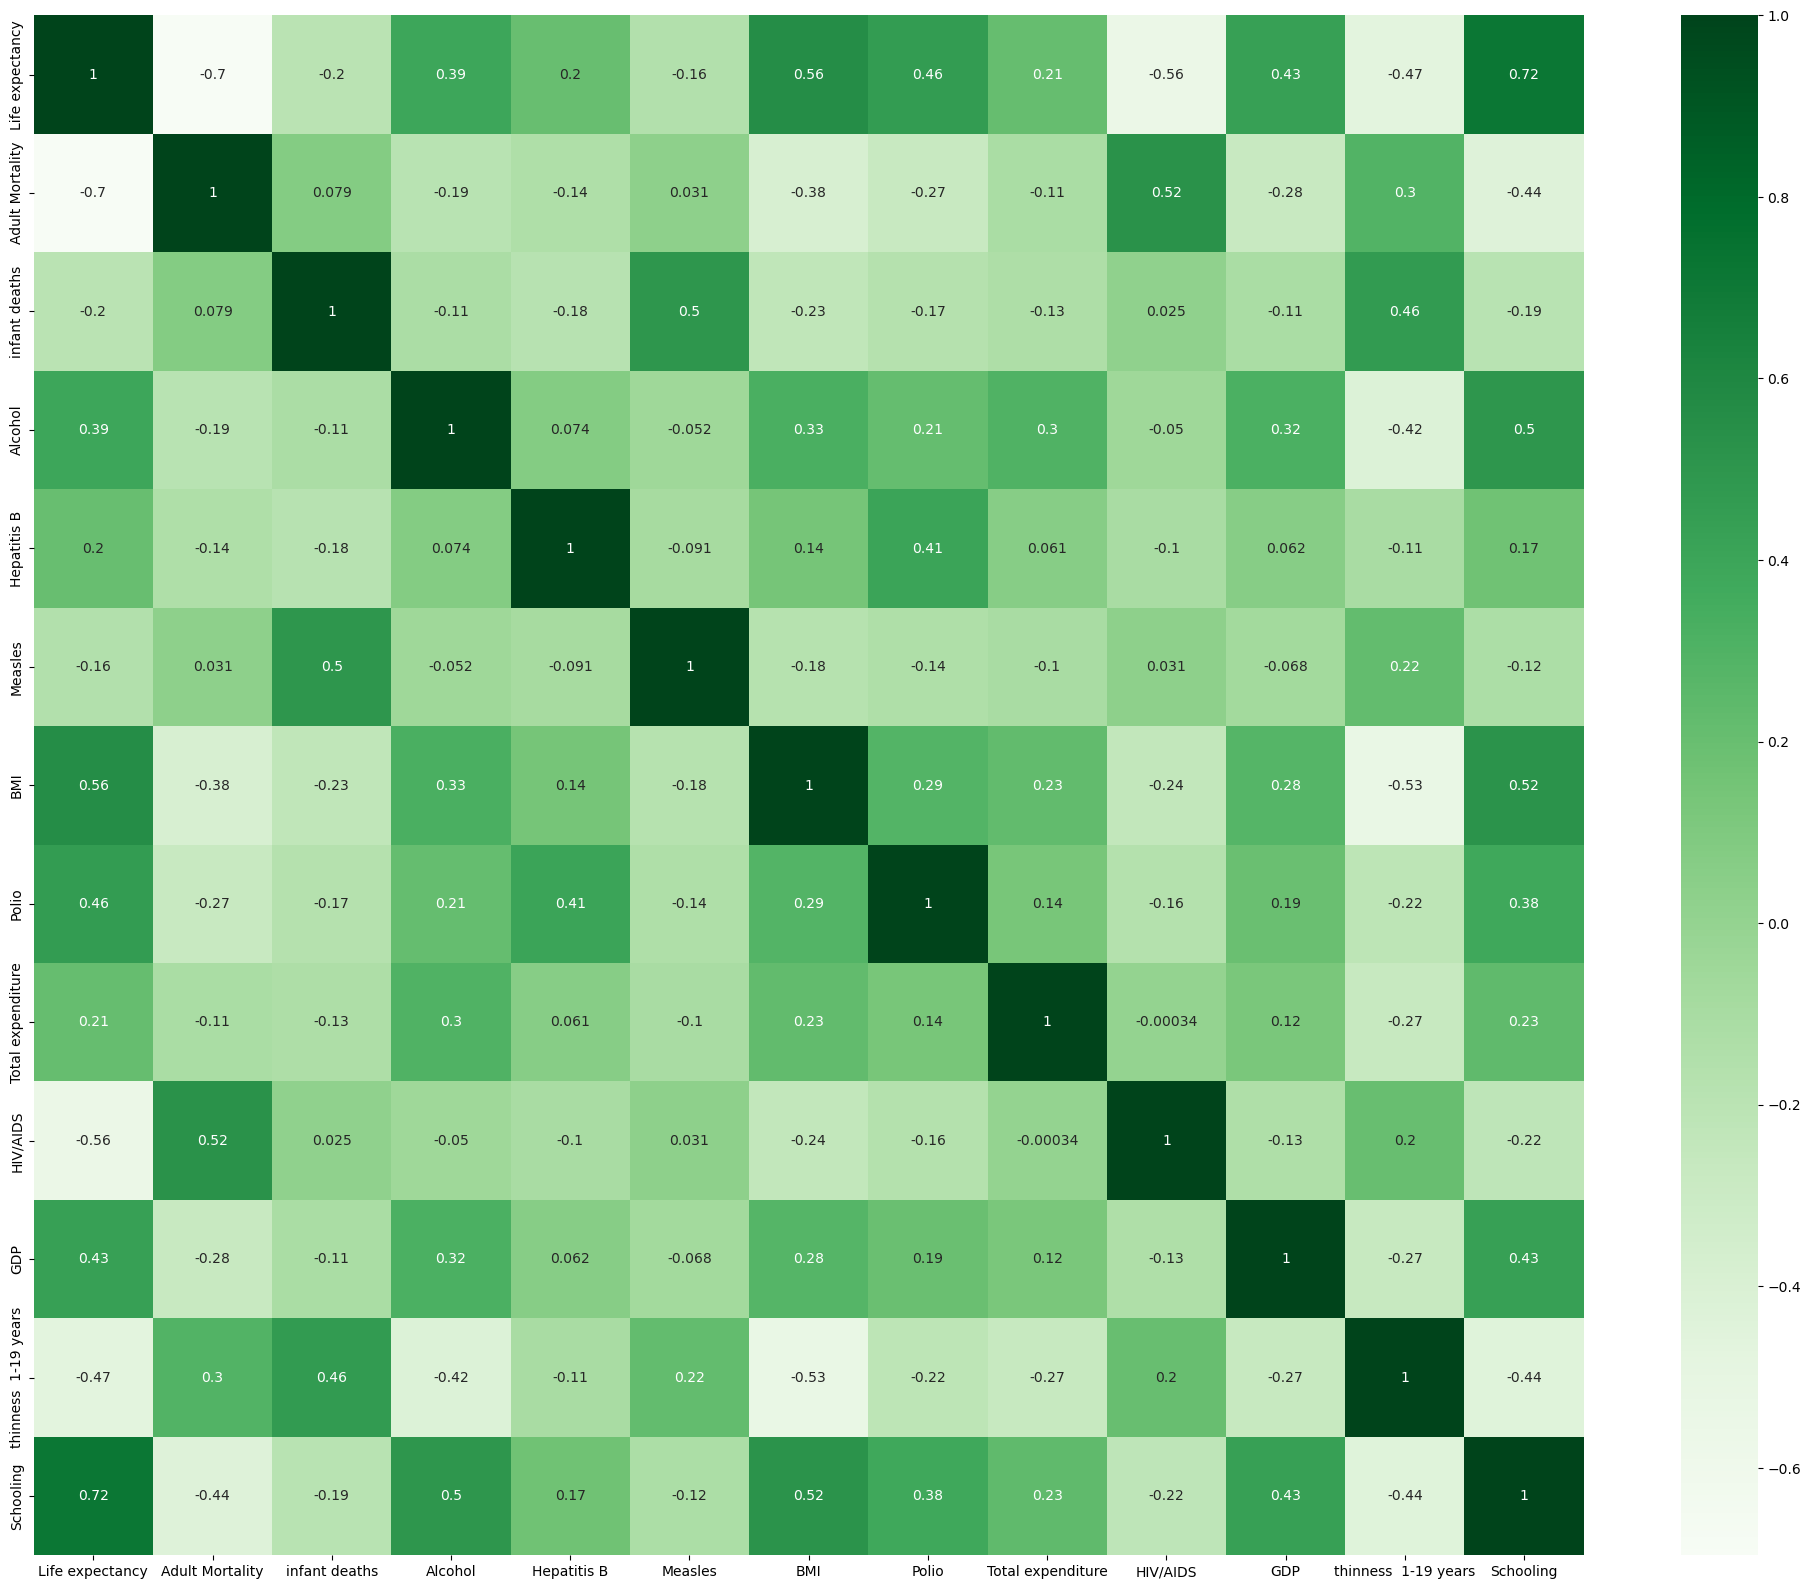

In [152]:
# correlation matrix:
le_data_num=le_data.select_dtypes('number')
plt.figure(figsize=(25,20))
sns.heatmap(le_data_num.corr(),annot=True,cmap='Greens')

plt.show()

## Correlation with Target Variable

<Axes: >

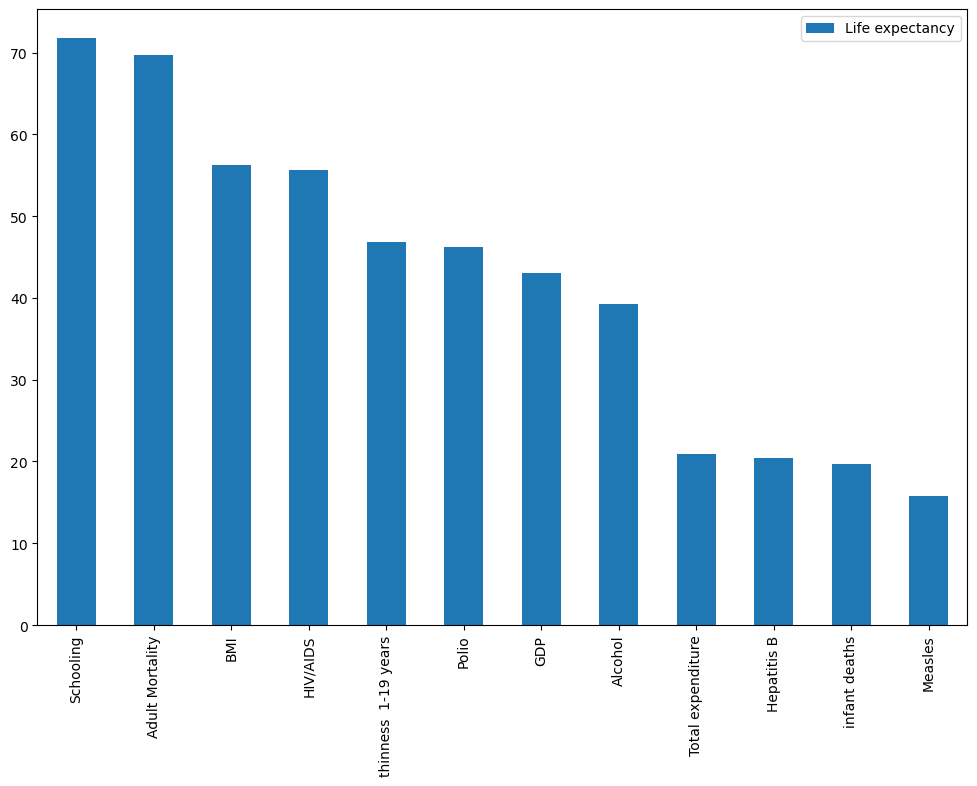

In [153]:
pd.DataFrame(abs(le_data.corr()['Life expectancy'].drop('Life expectancy')*100).sort_values(ascending=False)).plot.bar(figsize = (12,8))

In [154]:
X = le_data.drop(['Life expectancy'],axis=1)
y = le_data['Life expectancy']

In [155]:
X_num=X.select_dtypes('number')
X_num

,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,HIV/AIDS,GDP,thinness 1-19 years,Schooling
0,263.0,62,0.01,65.0,1154,19.1,6.0,8.16,0.1,584.259210,17.2,10.1
1,271.0,64,0.01,62.0,492,18.6,58.0,8.18,0.1,612.696514,17.5,10.0
2,268.0,66,0.01,64.0,430,18.1,62.0,8.13,0.1,631.744976,17.7,9.9
3,272.0,69,0.01,67.0,2787,17.6,67.0,8.52,0.1,669.959000,17.9,9.8
4,275.0,71,0.01,68.0,3013,17.2,68.0,7.87,0.1,63.537231,18.2,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,68.0,31,27.1,67.0,7.13,33.6,454.366654,9.4,9.2
2934,715.0,26,4.06,7.0,998,26.7,7.0,6.52,36.7,453.351155,9.8,9.5
2935,73.0,25,4.43,73.0,304,26.3,73.0,6.53,39.8,57.348340,1.2,10.0
2936,686.0,25,1.72,76.0,529,25.9,76.0,6.16,42.1,548.587312,1.6,9.8


In [156]:
X_cat=X.select_dtypes('object')
X_cat

,Status
0,Developing
1,Developing
2,Developing
3,Developing
4,Developing
...,...
2933,Developing
2934,Developing
2935,Developing
2936,Developing


### Robust Scaling numeric columns

In [157]:
scaler = RobustScaler()
X_num_scaled= scaler.fit_transform(X_num)

In [158]:
type(X_num_scaled)

numpy.ndarray

In [159]:
# Convert the scaled numpy array back to DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled,index=X_num.index,columns=X_num.columns)

In [160]:
X_num_scaled

,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,HIV/AIDS,GDP,thinness 1-19 years,Schooling
0,0.772727,2.681818,-0.659515,-1.462848,3.138716,-0.651226,-4.578947,0.753323,0.000000,-0.365604,2.527273,-0.578947
1,0.824675,2.772727,-0.659515,-1.662327,1.311249,-0.664850,-1.842105,0.760080,0.000000,-0.361492,2.581818,-0.605263
2,0.805195,2.863636,-0.659515,-1.529341,1.140097,-0.678474,-1.631579,0.743188,0.000000,-0.358737,2.618182,-0.631579
3,0.831169,3.000000,-0.659515,-1.329862,7.646653,-0.692098,-1.368421,0.874945,0.000000,-0.353211,2.654545,-0.657895
4,0.850649,3.090909,-0.659515,-1.263369,8.270531,-0.702997,-1.315789,0.655350,0.000000,-0.440903,2.709091,-0.736842
...,...,...,...,...,...,...,...,...,...,...,...,...
2933,3.759740,1.090909,0.031784,-1.263369,0.038647,-0.433243,-1.368421,0.405350,47.857143,-0.384387,1.109091,-0.815789
2934,3.707792,1.045455,-0.015892,-5.319447,2.708075,-0.444142,-4.526316,0.199269,52.285714,-0.384534,1.181818,-0.736842
2935,-0.461039,1.000000,0.042908,-0.930903,0.792271,-0.455041,-1.052632,0.202648,56.714286,-0.441797,-0.381818,-0.605263
2936,3.519481,1.000000,-0.387763,-0.731424,1.413389,-0.465940,-0.894737,0.077648,60.000000,-0.370762,-0.309091,-0.657895


In [161]:
X_num_scaled.shape

(2928, 12)

### OHE for categorical columns

In [162]:
X_cat_encoded=pd.get_dummies(X_cat,drop_first=False,dtype=int)

## Merge X_num_scaled and X_cat_encoded into X

In [163]:
X=pd.concat([X_num_scaled,X_cat_encoded],axis=1)

### Check for NA in X and y; Check for shape compatibility

In [164]:
print("Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

Checking for NAs and Shape Compatibility
Adult Mortality         0
infant deaths           0
Alcohol                 0
Hepatitis B             0
Measles                 0
BMI                     0
Polio                   0
Total expenditure       0
HIV/AIDS                0
GDP                     0
thinness  1-19 years    0
Schooling               0
Status_Developed        0
Status_Developing       0
dtype: int64
0
(2928, 14)
(2928,)


### Train-test split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)

In [166]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(2049, 14)
(879, 14)
(2049,)
(879,)


In [167]:
y_train

1888    52.9
2478    73.0
129     81.4
1432    63.1
275     59.3
        ... 
1514    72.5
2000    72.3
1066    75.0
743     78.9
595     62.5
Name: Life expectancy, Length: 2049, dtype: float64

# KNN Regressor

### Train the model with different K values and calculate RMSE scores.

In [168]:
k_values = np.arange(1, 15, 2)
train_rmse_scores = []
test_rmse_scores = []
r2_scores=[]


for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Train the model on the full training set and calculate train RMSE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    train_rmse_scores.append(train_rmse)
    
    # Calculate test RMSE
    test_pred = knn.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    test_rmse_scores.append(test_rmse)

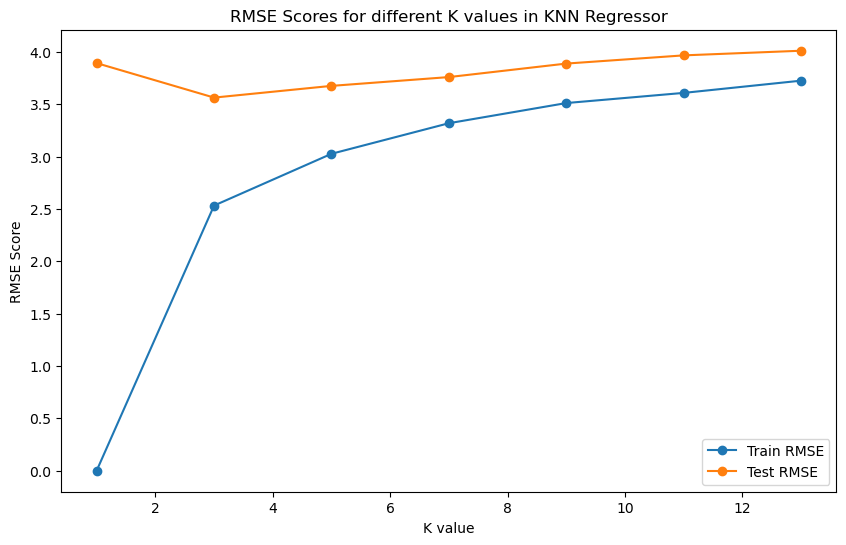

In [169]:
# Plotting Train RMSE, and Test RMSE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_rmse_scores, marker='o', label='Train RMSE')
plt.plot(k_values, test_rmse_scores, marker='o', label='Test RMSE')
plt.xlabel('K value')
plt.ylabel('RMSE Score')
plt.title('RMSE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

At k = 7 we can see the Train and test mse is low. Hence we can take k = 7. k=9 also gives lower mse but we have to take the optimal value of k which is not large and gives low mse.

In [170]:
knn = KNeighborsRegressor(n_neighbors=9)
model=knn.fit(X_train, y_train)

y_train_pred= model.predict(X_train)
y_test_pred=model.predict(X_test)

r2_train=model.score(X_train,y_train)

# compute train and test RMSE
rmse_train = np.sqrt(np.mean((y_train - y_train_pred)**2))
rmse_test = np.sqrt(np.mean((y_test - y_test_pred)**2))
r2_train,rmse_train,rmse_test

(0.8625598531921309, 3.51102472438738, 3.8879618954033166)

In [171]:
rowcount=X_train.shape[0]
featurecount= X_train.shape[1]
adj_r2_train=1-(((1-r2_train)*(rowcount-1))/(rowcount-featurecount-1))
adj_r2_train

0.8616138541482223

In [172]:
model_knn_performance = {'model':"KNN Regression",'R2_train':r2_train,'Adj_R2_train':adj_r2_train,'train_RMSE':rmse_train,'test_RMSE':rmse_test}
model_knn_performance

{'model': 'KNN Regression',
 'R2_train': 0.8625598531921309,
 'Adj_R2_train': 0.8616138541482223,
 'train_RMSE': 3.51102472438738,
 'test_RMSE': 3.8879618954033166}

# Decision Tree Regressor

In [173]:
from sklearn.tree import DecisionTreeRegressor

depth_values = np.arange(1, 15)
train_rmse_scores = []
test_rmse_scores = []
r2_scores=[]


for d in depth_values:
    dtr = DecisionTreeRegressor(max_depth=d)
    
    # Train the model on the full training set and calculate train RMSE
    dtr.fit(X_train, y_train)
    train_pred = dtr.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    train_rmse_scores.append(train_rmse)
    
    # Calculate test RMSE
    test_pred = dtr.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    test_rmse_scores.append(test_rmse)

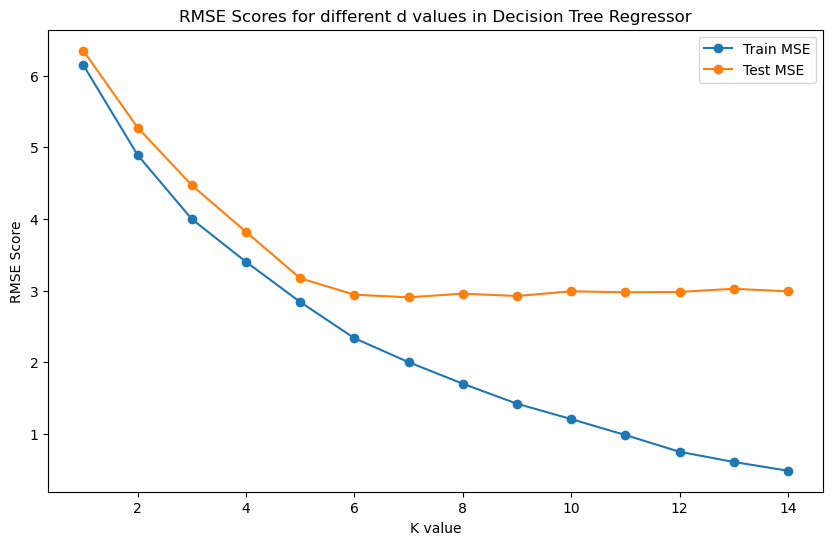

In [174]:
# Plotting Train RMSE, and Test RMSE for different d values
plt.figure(figsize=(10, 6))
plt.plot(depth_values, train_rmse_scores, marker='o', label='Train MSE')
plt.plot(depth_values, test_rmse_scores, marker='o', label='Test MSE')
plt.xlabel('K value')
plt.ylabel('RMSE Score')
plt.title('RMSE Scores for different d values in Decision Tree Regressor')
plt.legend()
plt.show()

In [175]:
dtr = DecisionTreeRegressor(max_depth=5)
model=dtr.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train=model.score(X_train,y_train)

# compute train and test RMSE
rmse_train = np.sqrt(np.mean((y_train - y_train_pred)**2))
rmse_test = np.sqrt(np.mean((y_test - y_test_pred)**2))

r2_train,rmse_train,rmse_test

(0.9099473131467006, 2.8420088117223172, 3.1730929262058045)

In [176]:
model_knn_performance = {'model':"Decision Tree Regression",'R2_train':r2_train,'train_RMSE':rmse_train,'test_RMSE':rmse_test}
model_knn_performance

{'model': 'Decision Tree Regression',
 'R2_train': 0.9099473131467006,
 'train_RMSE': 2.8420088117223172,
 'test_RMSE': 3.1730929262058045}

In [177]:
temp=pd.DataFrame({'features':model.feature_names_in_,'importance':model.feature_importances_})
temp

,features,importance
0,Adult Mortality,0.238784
1,infant deaths,0.005193
2,Alcohol,0.003213
3,Hepatitis B,0.000000
4,Measles,0.000000
5,BMI,0.024642
6,Polio,0.000000
7,Total expenditure,0.000000
8,HIV/AIDS,0.635958
9,GDP,0.000000


# Linear Regression

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lm = LinearRegression()
model_lr = lm.fit(X_train,y_train)

In [180]:
model_lr.intercept_,model_lr.coef_

(72.2098589646654,
 array([-3.48880977e+00,  3.15243743e-03,  9.21501543e-02, -7.73589086e-03,
        -1.28117005e-02,  1.64819071e+00,  1.01956303e+00,  2.51225409e-02,
        -3.16849969e-01,  3.03567748e-01, -5.72679884e-01,  3.76284580e+00,
         9.65457856e-01, -9.65457856e-01]))

### Hold Out Set Method:

In [181]:
y_train_pred=model_lr.predict(X_train)

In [182]:
R2_train=model_lr.score(X_train,y_train)
R2_train

0.8016743587779954

In [183]:
y_test_pred = model_lr.predict(X_test) 

In [184]:
rowcount=X_train.shape[0]
featurecount= X_train.shape[1]
adj_R2_train=1-(((1-R2_train)*(rowcount-1))/(rowcount-featurecount-1))
adj_R2_train

0.8003092855345795

In [185]:
# compute train and test RMSE
rmse_train = np.sqrt(np.mean((y_train - y_train_pred)**2))
rmse_test = np.sqrt(np.mean((y_test - y_test_pred)**2))
rmse_train,rmse_test

(4.217610949924978, 4.469262730129128)

In [186]:
# compute train and test MAPE
mape_train = np.mean(abs(y_train - y_train_pred)/y_train) * 100
mape_test = np.mean(abs(y_test - y_test_pred)/y_test) * 100
mape_train,mape_test

(4.840385532448743, 5.068672457777599)

In [187]:
model_lr_performance = {'model':"Linear Regression",'R2_train':R2_train,'Adj_R2_train':adj_R2_train,'train_RMSE':rmse_train,'test_MSE':rmse_test}

In [188]:
model_lr_performance

{'model': 'Linear Regression',
 'R2_train': 0.8016743587779954,
 'Adj_R2_train': 0.8003092855345795,
 'train_RMSE': 4.217610949924978,
 'test_MSE': 4.469262730129128}

In [189]:
coefficients=model_lr.coef_
absolute_coefficients = np.abs(coefficients)

# Calculate the feature importance as the percentage of contribution
feature_names = X_test.columns
feature_importance = (absolute_coefficients / np.sum(absolute_coefficients)) * 100

# Print the feature importance
for feature_name, importance in zip(feature_names, feature_importance):
    print(f"{feature_name} : {importance}%")

Adult Mortality : 26.461659250677872%
infant deaths : 0.023910367850402497%
Alcohol : 0.6989334883675337%
Hepatitis B : 0.05867459716560228%
Measles : 0.09717321209490234%
BMI : 12.501071666574376%
Polio : 7.733104166937954%
Total expenditure : 0.19054753929220036%
HIV/AIDS : 2.4032195711358937%
GDP : 2.302477587801878%
thinness  1-19 years : 4.3436188667671445%
Schooling : 28.540146906363752%
Status_Developed : 7.3227313894852415%
Status_Developing : 7.322731389485243%


## Important Features:

1. Schooling feature is the most important feature among all.
2. The next most important features is Adult mortality.
3. Number of deaths due to HIV/AIDs is also is an important feature in understanding the life expectancy of the people in the countries

## Comparing models: